# ¡Hola Robert! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Robert tu proyecto se destaca como un trabajo integral y meticuloso en cada etapa del proyecto, desde la preparación de datos hasta la evaluación del modelo, lo cual demuestra un enfoque sólido y profesional. Es admirable cómo abordaste la limpieza y validación de datos, incluyendo el manejo de valores faltantes y anomalías, asegurando la confiabilidad del modelo. Además, tu elección y optimización de los modelos predictivos fueron acertadas, obteniendo un sMAPE competitivo que respalda la precisión de las predicciones. 
    
Aunque incluiste interpretación en varias partes de tu desarrollo, es posible plantear ideas más profundas. Un proyecto en el contexto de ciencia o análisis de datos va más allá de escribir código y obtener valores; se trata de darles sentido y contexto para convertirlos en conocimiento útil. No basta con ejecutar funciones y visualizar datos; es fundamental comprender lo que significan, identificar patrones, detectar anomalías y extraer conclusiones relevantes. Este proceso permite tomar decisiones informadas, optimizar modelos y comunicar hallazgos de manera clara y efectiva, asegurando que el análisis no solo sea técnico, sino también comprensible y aplicable a la resolución de problemas reales. Ten en cuenta esto para futuros proyectos
    
Te deseo éxitos en tu próximo Sprint 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

----

In [1]:
import pandas as pd #Import library to manage DataFrames

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')

In [3]:
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')

In [4]:
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


(C * (F - T)) * 100 / (F * (C -T))

C= rougher.output.concentrate_au / final.output.concentrate_au
F= rougher.input.feed_au / rougher.output.concentrate_au
T= rougher.output.tail_au / final.output.tail_au

((train_df['rougher.output.concentrate_au'] / (train_df['final.output.concentrate_au'])
* (train_df['rougher.input.feed_au'] / train_df['rougher.output.concentrate_au']
- train_df['rougher.output.tail_au'] / train_df['final.output.tail_au']))
* 100
/ ((train_df['rougher.input.feed_au'] / train_df['rougher.output.concentrate_au'])
* (train_df['rougher.output.concentrate_au'] / train_df['final.output.concentrate_au']   
- train_df['rougher.output.tail_au'] / train_df['final.output.tail_au']))

In [8]:
#Calculate the rougher output recovery
(
    (train_df['rougher.output.concentrate_au']) *
    (train_df['rougher.input.feed_au'] -
     train_df['rougher.output.tail_au'])
) * 100 / (
    (train_df['rougher.input.feed_au']) *
    (train_df['rougher.output.concentrate_au'] -
     train_df['rougher.output.tail_au'])
)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [9]:
#Assign the rougher output recovery to a variable
rougher_output_recovery_calculation = (
    (train_df['rougher.output.concentrate_au']) *
    (train_df['rougher.input.feed_au'] -
     train_df['rougher.output.tail_au'])
) * 100 / (
    (train_df['rougher.input.feed_au']) *
    (train_df['rougher.output.concentrate_au'] -
     train_df['rougher.output.tail_au'])
)

In [10]:
#Show the rougher output recovery column
train_df['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [11]:
#Drop NaN values from the column
no_nan_rougher_output_recovery = train_df['rougher.output.recovery'].dropna()

In [12]:
#Select the same date than the one there is in the no_nan_rougher_output_recovery column
no_nan_rougher_output_recovery_calculation = rougher_output_recovery_calculation[pd.notna(train_df['rougher.output.recovery'])]

In [13]:
no_nan_rougher_output_recovery_calculation

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [14]:
len(no_nan_rougher_output_recovery) #Verify both sets have the same amount of observations to compare

14287

In [15]:
len(no_nan_rougher_output_recovery_calculation) #Verify both sets have the same amount of observations to compare

14287

In [16]:
from sklearn.metrics import mean_absolute_error #Import module to get MAE

In [17]:
print(mean_absolute_error(no_nan_rougher_output_recovery, no_nan_rougher_output_recovery_calculation))

1.0724115653039479e-14


There is a minimal difference in the mean absolute error (MAE) of the rougher output recovery column and the recently calculated data. The data shown by head and tail methods is identical. This insignificant difference could be related to the decimals rounding.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has hecho un buen trabajo implementando la fórmula de recuperación del concentrado de oro, y el uso de la asignación a una variable mejora la legibilidad del código.

</div>

In [18]:
train_df['final.output.recovery']

0        70.541216
1        69.266198
2        68.116445
3        68.347543
4        66.927016
           ...    
16855    73.755150
16856    69.049291
16857    67.002189
16858    65.523246
16859    70.281454
Name: final.output.recovery, Length: 16860, dtype: float64

In [19]:
#Look for the presence of NaN values
train_df['final.output.recovery'].isna().sum()

1521

In [20]:
#Drop NaN values from the column
no_nan_final_output_recovery = train_df['final.output.recovery'].dropna()

In [21]:
#Calculate the actual final output recovery
(
    (train_df['final.output.concentrate_au']) *
    (train_df['rougher.output.concentrate_au'] -
     train_df['final.output.tail_au'])
) * 100 / (
    (train_df['rougher.output.concentrate_au']) *
    (train_df['final.output.concentrate_au'] -
     train_df['final.output.tail_au'])
)

0        93.944554
1        93.790501
2        93.509750
3        93.595268
4        93.811976
           ...    
16855    94.886132
16856    94.507593
16857    92.593426
16858    94.268532
16859    95.048379
Length: 16860, dtype: float64

In [22]:
#Assign the final output recovery to a variable
final_output_recovery_calculation = (
    (train_df['final.output.concentrate_au']) *
    (train_df['rougher.output.concentrate_au'] -
     train_df['final.output.tail_au'])
) * 100 / (
    (train_df['rougher.output.concentrate_au']) *
    (train_df['final.output.concentrate_au'] -
     train_df['final.output.tail_au'])
)

In [23]:
#Look for the presence of NaN values
final_output_recovery_calculation.isna().sum()

1283

In [24]:
#Select the same date than the one there is in the no_nan_rougher_output_recovery column
no_nan_final_output_recovery_calculation = final_output_recovery_calculation[pd.notna(train_df['final.output.recovery'])]

In [25]:
#Verify both sets have the same amount of observations to compare
len(no_nan_final_output_recovery)

15339

In [26]:
#Verify both sets have the same amount of observations to compare
len(no_nan_final_output_recovery_calculation)

15339

In [27]:
#Verify remaining NaN values
no_nan_final_output_recovery_calculation.isna().sum()

15

In [28]:
import numpy as np #Import numpy library to identify finite values

In [29]:
#Select values that are finite
no_nan_final_output_recovery = no_nan_final_output_recovery[np.isfinite(no_nan_final_output_recovery_calculation)]

In [30]:
#Select values that are finite
no_nan_final_output_recovery = no_nan_final_output_recovery[np.isfinite(no_nan_final_output_recovery)]
no_nan_final_output_recovery_calculation = no_nan_final_output_recovery_calculation[np.isfinite(no_nan_final_output_recovery_calculation)]

In [31]:
#Final selection of not NaN values
no_nan_final_output_recovery = no_nan_final_output_recovery[pd.notna(no_nan_final_output_recovery_calculation)]

In [32]:
#Final selection of not NaN values
no_nan_final_output_recovery_calculation.dropna(inplace=True)

In [33]:
print(mean_absolute_error(no_nan_final_output_recovery, no_nan_final_output_recovery_calculation))

178.2376411115655


Greater differences are found in the final ouput recovery calculations compared to its original column.
That's why a replacement of this colum data by the real calculated values is recommended and will be done in the next code line

In [34]:
train_df['rougher.output.recovery'] = no_nan_final_output_recovery_calculation

In [35]:
train_df['rougher.output.recovery']

0        93.944554
1        93.790501
2        93.509750
3        93.595268
4        93.811976
           ...    
16855    94.886132
16856    94.507593
16857    92.593426
16858    94.268532
16859    95.048379
Name: rougher.output.recovery, Length: 16860, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu trabajo muestra un buen manejo de la limpieza y validación de datos, lo cual es fundamental en cualquier proyecto de ciencia de datos. Has realizado un buen uso de métodos como dropna() y notna() para eliminar valores faltantes y asegurarte de que los conjuntos de datos estén alineados. 

</div>

# Remove date column from both dataframes

In [36]:
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

# Analyze absent features in the test data set

The absent columns in the test dataframe are the ones releted to the output production of minerals.
Since we don't have any data to calculate the proportion of recovery, we have to predic it using machine learning models.

# Eliminate NaN from train_df to do the distruibution of minerals output analysis

In [37]:
train_df.dropna(inplace=True)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10958 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         10958 non-null  float64
 1   final.output.concentrate_pb                         10958 non-null  float64
 2   final.output.concentrate_sol                        10958 non-null  float64
 3   final.output.concentrate_au                         10958 non-null  float64
 4   final.output.recovery                               10958 non-null  float64
 5   final.output.tail_ag                                10958 non-null  float64
 6   final.output.tail_pb                                10958 non-null  float64
 7   final.output.tail_sol                               10958 non-null  float64
 8   final.output.tail_au                                10958 non-null  float64


There were a lot of data that was erased because of null values.
Have to comunicate this with the data engineer so his team makes sure the data is properly collected or has a reason why this data couldn't be taken.

In [39]:
import matplotlib.pyplot as plt #Import package to graph boxplots

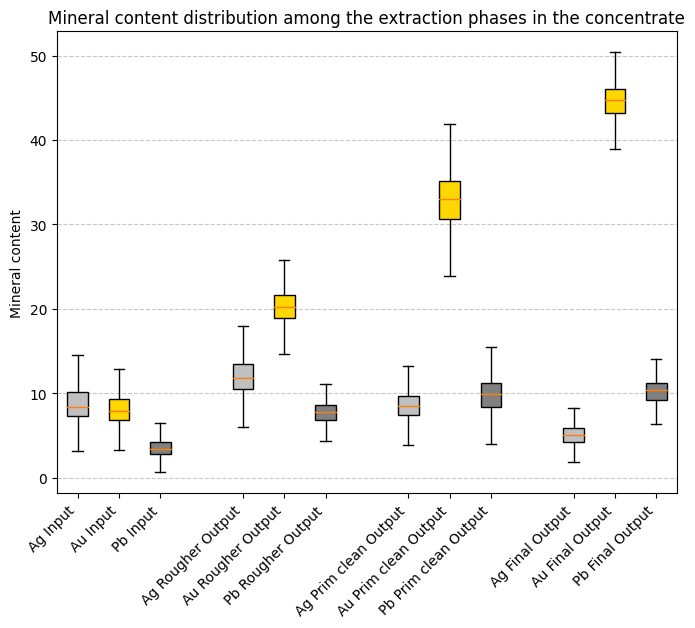

In [40]:
# Graph mineral distribution among extraction phases
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    
    [train_df['rougher.input.feed_ag'], 
     train_df['rougher.input.feed_au'],
     train_df['rougher.input.feed_pb'], 
     train_df['rougher.output.concentrate_ag'],
     train_df['rougher.output.concentrate_au'],
     train_df['rougher.output.concentrate_pb'],
     train_df['primary_cleaner.output.concentrate_ag'],
     train_df['primary_cleaner.output.concentrate_au'],
     train_df['primary_cleaner.output.concentrate_pb'], 
     train_df['final.output.concentrate_ag'],
     train_df['final.output.concentrate_au'],
     train_df['final.output.concentrate_pb']],
    
    labels=['Ag Input', 
            'Au Input', 
            'Pb Input', 
            'Ag Rougher Output', 
            'Au Rougher Output', 
            'Pb Rougher Output', 
            'Ag Prim clean Output', 
            'Au Prim clean Output',
            'Pb Prim clean Output',
            'Ag Final Output',
            'Au Final Output',
            'Pb Final Output'],
    
    patch_artist=True, #Fill the boxes with color
    
    # Separate each extraction phase by skipping one number in between them
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15],
    
    showfliers=False #Hide outliers
)

colors = [
    '#C0C0C0',  # Ag Input (Silver)
    '#FFD700',  # Au Input (Gold)
    '#808080',  # Pb Input (Lead)
    '#C0C0C0',  # Ag Rougher Output (Silver)
    '#FFD700',  # Au Rougher Output (Gold)
    '#808080',  # Pb Rougher Output (Lead)
    '#C0C0C0',  # Ag Prim clean Output (Silver)
    '#FFD700',  # Au Prim clean Output (Gold)
    '#808080',  # Pb Prim clean Output (Lead)
    '#C0C0C0',  # Ag Final Output (Silver)
    '#FFD700',  # Au Final Output (Gold)
    '#808080',  # Pb Final Output (Lead)
]

# Asign a color per mineral
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors[i])  # Asigna color a cada caja

# Rotate the labels
plt.xticks(rotation=45, ha='right')  # 45 roation degrees to the right

# ELabels and title
plt.ylabel("Mineral content")
plt.title("Mineral content distribution among the extraction phases in the concentrate")
plt.grid(axis='y', linestyle='--', alpha=0.7)

The previous graph shows that as the extraction phases move forward, the concentration of gold increases.
While the silver concetration decreases, the lead concentration remains relatively stable.

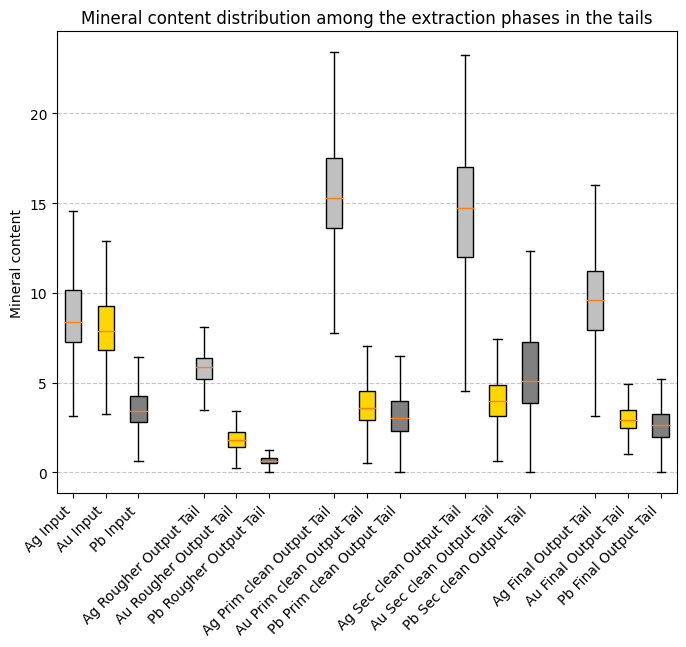

In [41]:
# Graph mineral distribution among extraction phases
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    
    [train_df['rougher.input.feed_ag'], 
     train_df['rougher.input.feed_au'],
     train_df['rougher.input.feed_pb'], 
     train_df['rougher.output.tail_ag'],
     train_df['rougher.output.tail_au'],
     train_df['rougher.output.tail_pb'],
     train_df['primary_cleaner.output.tail_ag'],
     train_df['primary_cleaner.output.tail_au'],
     train_df['primary_cleaner.output.tail_pb'],
     train_df['secondary_cleaner.output.tail_ag'], 
     train_df['secondary_cleaner.output.tail_au'],
     train_df['secondary_cleaner.output.tail_pb'],
     train_df['final.output.tail_ag'],
     train_df['final.output.tail_au'],
     train_df['final.output.tail_pb']],
    
    labels=['Ag Input', 
            'Au Input', 
            'Pb Input', 
            'Ag Rougher Output Tail', 
            'Au Rougher Output Tail', 
            'Pb Rougher Output Tail', 
            'Ag Prim clean Output Tail', 
            'Au Prim clean Output Tail',
            'Pb Prim clean Output Tail',
            'Ag Sec clean Output Tail', 
            'Au Sec clean Output Tail',
            'Pb Sec clean Output Tail',
            'Ag Final Output Tail',
            'Au Final Output Tail',
            'Pb Final Output Tail'],
    
    patch_artist=True, #Fill the boxes with color
    
    # Separate each extraction phase by skipping one number in between them
positions = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19],
    
    showfliers=False #Hide outliers
)

colors = [
    '#C0C0C0',  # Ag Input (Silver)
    '#FFD700',  # Au Input (Gold)
    '#808080',  # Pb Input (Lead)
    '#C0C0C0',  # Ag Rougher Output (Silver)
    '#FFD700',  # Au Rougher Output (Gold)
    '#808080',  # Pb Rougher Output (Lead)
    '#C0C0C0',  # Ag Prim clean Output (Silver)
    '#FFD700',  # Au Prim clean Output (Gold)
    '#808080',  # Pb Prim clean Output (Lead)
    '#C0C0C0',  # Ag Sec clean Output (Silver)
    '#FFD700',  # Au Sec clean Output (Gold)
    '#808080',  # Pb Sec clean Output (Lead)
    '#C0C0C0',  # Ag Final Output (Silver)
    '#FFD700',  # Au Final Output (Gold)
    '#808080',  # Pb Final Output (Lead)
]

# Asign a color per mineral
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors[i])  # Asigna color a cada caja

# Rotate the labels
plt.xticks(rotation=45, ha='right')  # 45 roation degrees to the right

# ELabels and title
plt.ylabel("Mineral content")
plt.title("Mineral content distribution among the extraction phases in the tails")
plt.grid(axis='y', linestyle='--', alpha=0.7)

The graph shows that the tails keep a low proportion of the initial gold feed.
As the extraction phases move forward the concentration of gold and lead stays relatively stable as it gets rid of the silver.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis y visualización de datos son muy sólidos y demuestran un buen entendimiento del proceso de extracción de minerales. Has realizado un trabajo excelente al eliminar la columna date y al identificar las características ausentes en el conjunto de prueba, lo cual es crucial para preparar los datos para el modelado. Además, tu enfoque para eliminar valores NaN y comunicar este problema al equipo de ingeniería de datos es muy profesional y refleja una buena práctica en ciencia de datos. Las visualizaciones con matplotlib están bien diseñadas, con colores distintivos para cada mineral y etiquetas claras, lo que facilita la interpretación de los resultados. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


    
Sería recomendable explorar técnicas de imputación de datos para manejar los valores faltantes en lugar de eliminarlos directamente. Segundo, aunque has ocultado los outliers con showfliers=False, sería útil analizarlos por separado para entender si representan errores de medición o comportamientos anómalos en el proceso.

</div>


</div>

# Eliminate NaN from test_df to do an A/B test of the mineral feed size between train and test DF

In [42]:
test_df.dropna(inplace=True)

In [43]:
test_df['rougher.input.feed_size'].isna().sum()

0

In [44]:
from scipy import stats #Import package to do statiscal analysis

In [45]:
#Normal distribution test for rougher.input.feed_size
train_ks_stat, train_ks_pvalue = stats.kstest(train_df['rougher.input.feed_size'], 'norm')

print(f'K-S Statistic: {train_ks_stat}')
print(f'K-S p value: {train_ks_pvalue}')

# Interpret the result
alpha = 0.05  # Significance level
if train_ks_pvalue < alpha:
    print("Reject H0: The train sample does not follow a normal distribution.")
else:
    print("H0 is not rejected: The train sample follows a normal distribution.")
    
print()    
    
test_ks_stat, test_ks_pvalue = stats.kstest(test_df['rougher.input.feed_size'], 'norm')

print(f'K-S Statistic: {test_ks_stat}')
print(f'K-S p value: {test_ks_pvalue}')

# Interpret the result
alpha = 0.05  # Significance level
if test_ks_pvalue < alpha:
    print("Reject H0: The test sample does not follow a normal distribution.")
else:
    print("H0 is not rejected: test The sample follows a normal distribution.")

K-S Statistic: 1.0
K-S p value: 0.0
Reject H0: The train sample does not follow a normal distribution.

K-S Statistic: 0.9992569199331228
K-S p value: 0.0
Reject H0: The test sample does not follow a normal distribution.


Test if train and test sample both come from the same distribution with the K_S 2_sample test

In [46]:
#Test if both samples (rougher.input.feed_size train and test) come from the same distribution
ks2_stat, ks2_pvalue = stats.ks_2samp(train_df['rougher.input.feed_size'],
                                                  test_df['rougher.input.feed_size'])

print(f'K-S 2 samp Statistic: {ks2_stat}')
print(f'K-S 2 samp p value: {ks2_pvalue}')

# Interpret the result
alpha = 0.05  # Significance level
if train_ks_pvalue < alpha:
    print("Reject H0: The 2 samples come from different distributions.")
else:
    print("H0 is not rejected: The 2 samples come from the same distribution.")

K-S 2 samp Statistic: 0.23654097246043418
K-S 2 samp p value: 3.556738865784189e-178
Reject H0: The 2 samples come from different distributions.


Since the 2 samples to analyze don't have a normal distribution and come from different distributions the most appropiate statiscal A/B test is the bootstrapping one.

In [47]:
# Real difference between the 2 samples mean
sample_A = test_df['rougher.input.feed_size']
sample_B = train_df['rougher.input.feed_size']

AB_difference = sample_B.mean() - sample_A.mean()# Calculate the mean difference between samples
print("Difference between the samples mean:", AB_difference)

alpha = 0.05 #Significance level
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    # Concatenate the samples
    united_samples = pd.concat([sample_A, sample_B])

    # Create a subsample
    subsample = united_samples.sample(frac=1, replace=True, random_state=state)
    
    # Split the subsample by lenght of the original sample
    subsample_A = subsample[:len(sample_A)]# First slice
    subsample_B = subsample[len(sample_A):]# Second slice

    # Find the subsample mean difference
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    
    # If the difference of the subsample mean is NOT less than the sample mean difference, add 1 to the counter
    if bootstrap_difference >= AB_difference:
        count += 1

# The p value is the proportion between the exceeded values and the number of subsamples taken
pvalue = count / bootstrap_samples
print('p-value =', pvalue)

if pvalue < alpha:
    print("Reject H0: There is a significant difference between the samples mean.")
else:
    print("H0 is not rejected: There is NOT a significant difference between the samples mean.")

Difference between the samples mean: 1.0330981292979189
p-value = 0.002
Reject H0: There is a significant difference between the samples mean.


Since there is significant difference between the train and the test Rougher input feed size, the machine learning model application won't be correct.
Have to inform the manager to take more data or have in mind that the ml model predictions wouldn't be the most suitable.

# Compare the particle size in the train and test sets with graphs

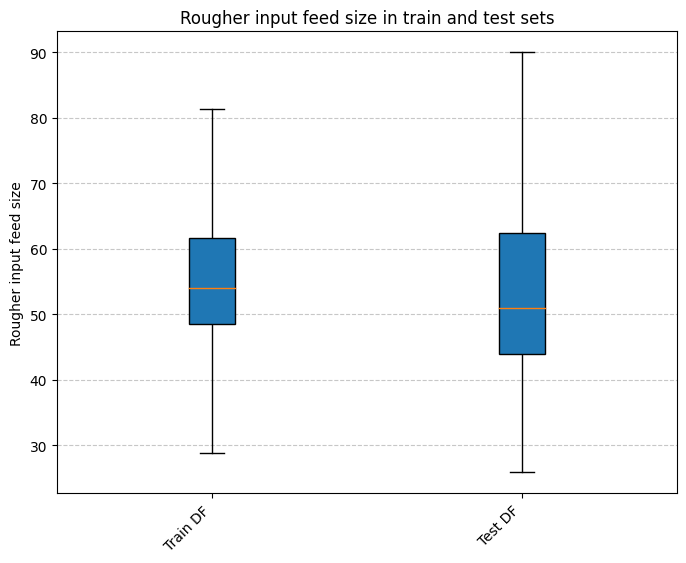

In [48]:
# Graph mineral distribution among extraction phases
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    
    [train_df['rougher.input.feed_size'], 
     test_df['rougher.input.feed_size'],
    ],
    
    labels=['Train DF', 
            'Test DF', 
            ],
    
    patch_artist=True, #Fill the boxes with color
    
    showfliers=False #Hide outliers
)

colors = [
    
]


# Rotate the labels
plt.xticks(rotation=45, ha='right')  # 45 roation degrees to the right

# ELabels and title
plt.ylabel("Rougher input feed size")
plt.title("Rougher input feed size in train and test sets")
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [49]:
#Create a function to remove outliers from train and test samples to make a violin plot
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Remove values outside of 1.5*IQR from the quartiles
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [50]:
#Apply remove_outliers function to the 2 samples
no_ol_sample_B = remove_outliers(train_df, 'rougher.input.feed_size')
no_ol_sample_A = remove_outliers(test_df, 'rougher.input.feed_size')

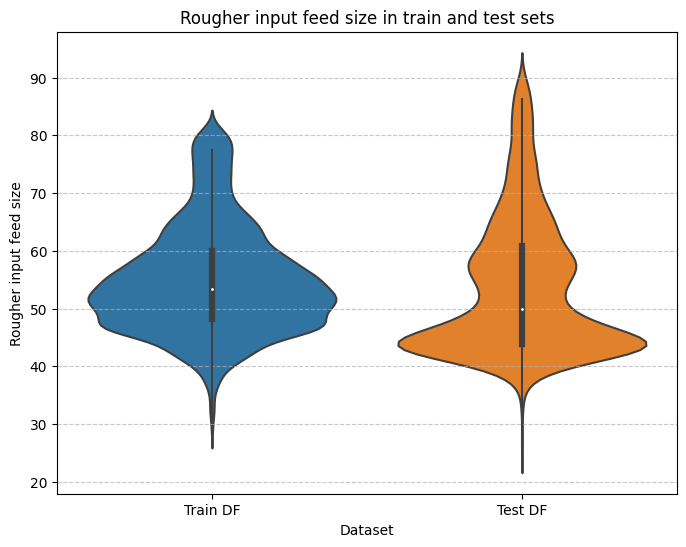

In [51]:
#Build a violin plot the compare the train and the test Rougher input size
import seaborn as sns #Impor library that crates violin plots

# Prepare the data
data = {
    'train_feed_size': no_ol_sample_B['rougher.input.feed_size'],
    'test_feed_size': no_ol_sample_A['rougher.input.feed_size']
}

# Create a DataFrame from the two sample sets
df = pd.DataFrame(data)

# Plot mustache-style graph (violin plot)
plt.figure(figsize=(8, 6))

# Violin plot for train and test feed sizes
sns.violinplot(data=df, inner='box', scale='width', showfliers=False)

# Labels and title
plt.xlabel("Dataset")
plt.ylabel("Rougher input feed size")
plt.title("Rougher input feed size in train and test sets")

# Rotate the labels
plt.xticks([0, 1], ['Train DF', 'Test DF'])

# Grid and styling
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

Both boxplot and violin plot graphs show the difference between train and test Rougher input size

In [52]:
test_df['rougher.input.feed_size'].describe()

count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

# Eliminate outliers from minerals in different stages and the other substances as well

In [53]:
# Define a function to detect and count outliers based on the IQR
def count_outliers(df):
    outliers_info = {}  # Dictionary to store the results
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Count the outliers
        num_outliers = outliers.shape[0]
        
        # Calculate the proportion between outliers and the sample number
        total_samples = df.shape[0]
        proportion_outliers = num_outliers / total_samples

        # Store the outliers data per column
        outliers_info[column] = {
            'num_outliers': num_outliers,
            'proportion_outliers': proportion_outliers,
            'outliers': outliers
        }

    return outliers_info

# Count outliers in all the columns of the DF
outliers_info = count_outliers(train_df)

# Show the results for every column
for column, info in outliers_info.items():
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Proportion of outliers: {info['proportion_outliers'] * 100:.2f}%")
    
    # Show the first rows with outliers if there are any
    #if info['num_outliers'] > 0:
        #print(f"First outliers in {column}:")
        #print(info['outliers'].head())


Column: final.output.concentrate_ag
Number of outliers: 347
Proportion of outliers: 3.17%

Column: final.output.concentrate_pb
Number of outliers: 220
Proportion of outliers: 2.01%

Column: final.output.concentrate_sol
Number of outliers: 671
Proportion of outliers: 6.12%

Column: final.output.concentrate_au
Number of outliers: 561
Proportion of outliers: 5.12%

Column: final.output.recovery
Number of outliers: 453
Proportion of outliers: 4.13%

Column: final.output.tail_ag
Number of outliers: 204
Proportion of outliers: 1.86%

Column: final.output.tail_pb
Number of outliers: 73
Proportion of outliers: 0.67%

Column: final.output.tail_sol
Number of outliers: 879
Proportion of outliers: 8.02%

Column: final.output.tail_au
Number of outliers: 306
Proportion of outliers: 2.79%

Column: primary_cleaner.input.sulfate
Number of outliers: 20
Proportion of outliers: 0.18%

Column: primary_cleaner.input.depressant
Number of outliers: 0
Proportion of outliers: 0.00%

Column: primary_cleaner.inp

In [54]:
# Define a function to remove outliers based on the IQR
def remove_outliers(df):
    cleaned_df = df.copy()  # Make a copy of the original DataFrame to preserve it

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove the outliers by filtering the rows within the bounds
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

# Remove outliers from the train DataFrame
no_ol_train_df = remove_outliers(train_df)

# We now have a 'no_ol_train_df' DataFrame without outliers


In [55]:
no_ol_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 354 to 16428
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         1777 non-null   float64
 1   final.output.concentrate_pb                         1777 non-null   float64
 2   final.output.concentrate_sol                        1777 non-null   float64
 3   final.output.concentrate_au                         1777 non-null   float64
 4   final.output.recovery                               1777 non-null   float64
 5   final.output.tail_ag                                1777 non-null   float64
 6   final.output.tail_pb                                1777 non-null   float64
 7   final.output.tail_sol                               1777 non-null   float64
 8   final.output.tail_au                                1777 non-null   float64

A lot of data was lost after erasing outliers

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Robert has realizado un excelente trabajo al eliminar los valores NaN y al utilizar pruebas estadísticas como el test de Kolmogorov-Smirnov para evaluar la distribución de los datos. Además, tu implementación del bootstrapping para comparar las medias de las muestras es muy acertada, especialmente al identificar que las distribuciones no son normales. Las visualizaciones son claras y efectivas para comunicar las diferencias entre los conjuntos de entrenamiento y prueba.


</div>

# Machine learning model Cross-validation

In [56]:
#Import ML model builder modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import cross_val_score #Import library to do cross validation in ML models

In [58]:
#Obtain the target columns to remove them later in the features DF
target_columns = set(train_df.columns) - set(test_df.columns)

In [59]:
#Define features
no_ol_train_features = no_ol_train_df.drop(list(target_columns), axis=1)

In [60]:
#Define targets
rougher_no_ol_train_target = no_ol_train_df['rougher.output.recovery']
final_no_ol_train_target = no_ol_train_df['final.output.recovery']

In [61]:
#Search the best Random Forest model maximal depth for Rougher Output Recovery
best_r2 = -float('inf')

best_depth = 0
for depth in range (1, 11):
        model = RandomForestRegressor(max_depth=depth, random_state=54321, n_estimators=10)
        
        r2_scores = cross_val_score(model, no_ol_train_features, rougher_no_ol_train_target, cv=5, scoring='r2')
        mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_depth = depth
            
print(
    "The coefficient of determination (R²) of the best model:",
    best_r2,
    "best_depth:", best_depth
)

The coefficient of determination (R²) of the best model: 0.09144288161704836 best_depth: 1


In [62]:
#Search the best Random Forest model maximal number of estimators for Rougher Output Recovery
best_r2 = -float('inf')
best_est = 0
best_depth = 0
for est in range(10, 31, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(max_depth=depth, random_state=54321, n_estimators=est)
        
        r2_scores = cross_val_score(model, no_ol_train_features, rougher_no_ol_train_target, cv=5, scoring='r2')
        mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_est = est
            best_depth = depth
            
print(
    "The coefficient of determination (R²) of the best model:",
    best_r2,
    "n_estimators:", best_est,
    "best_depth:", best_depth
)

The coefficient of determination (R²) of the best model: 0.09332446030148958 n_estimators: 20 best_depth: 1


In [63]:
# Define a Logistic Regression model for Rougher Output Recovery
lr_model = LinearRegression()
        
r2_scores = cross_val_score(lr_model, no_ol_train_features, rougher_no_ol_train_target, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
print('Mean score of the model:', mean_r2)

Mean score of the model: 0.07676917914397899


In [64]:
#Search the best Random Forest model maximal depth for Final Output Recovery
best_r2 = -float('inf')

best_depth = 0
for depth in range (1, 11):
        model = RandomForestRegressor(max_depth=depth, random_state=54321, n_estimators=10)
        
        r2_scores = cross_val_score(model, no_ol_train_features, final_no_ol_train_target, cv=5, scoring='r2')
        mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_est = est
            best_depth = depth
            
print(
    "The coefficient of determination (R²) of the best model:",
    best_r2,
    "best_depth:", best_depth
)

The coefficient of determination (R²) of the best model: -0.22204204849166098 best_depth: 5


In [65]:
#Search the best Random Forest model maximal number of estimators for Final Output Recovery
best_r2 = -float('inf')
best_est = 0
best_depth = 0
for est in range(10, 31, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(max_depth=depth, random_state=54321, n_estimators=est)
        
        r2_scores = cross_val_score(model, no_ol_train_features, final_no_ol_train_target, cv=5, scoring='r2')
        mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
        if mean_r2 > best_r2:
            best_r2 = mean_r2
            best_est = est
            best_depth = depth
            
print(
    "The coefficient of determination (R²) of the best model:",
    best_r2,
    "n_estimators:", best_est,
    "best_depth:", best_depth
)

The coefficient of determination (R²) of the best model: -0.2040468635413517 n_estimators: 20 best_depth: 5


In [66]:
# Define a Logistic Regression model for Final Output Recovery
lr_model = LinearRegression()
        
r2_scores = cross_val_score(lr_model, no_ol_train_features, rougher_no_ol_train_target, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()  # Promedio de R² de todas las particiones
        
print('Mean score of the model:', mean_r2)

Mean score of the model: 0.07676917914397899


The best models found were:
    Random Forest Regressor for Rougher Output Recovery
    Linear Regression for Final Output Recovery

# Fitting best model for Rougher and final output recovery

In [67]:
best_rougher_model = RandomForestRegressor(max_depth=1, random_state=54321, n_estimators=20)
best_rougher_model.fit(no_ol_train_features, rougher_no_ol_train_target)

RandomForestRegressor(max_depth=1, n_estimators=20, random_state=54321)

In [68]:
best_final_model = LinearRegression()
best_final_model.fit(no_ol_train_features, final_no_ol_train_target)

LinearRegression()

In [69]:
# Define function to calculate sMAPE
from sklearn.metrics import mean_absolute_error


def smape(y_true, y_pred):
    #
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return 100 * np.mean(diff)

In [70]:
#Print Rougher Output Recovery sMAPE
rougher_smape = smape(rougher_no_ol_train_target, best_rougher_model.predict(no_ol_train_features))
print(rougher_smape)

1.2375356402372106


In [71]:
#Print Final Output Recovery sMAPE
final_smape = smape(final_no_ol_train_target, best_final_model.predict(no_ol_train_features))
print(final_smape)

3.885097615029969


In [72]:
# Calculate the Total sMAPE
total_smape = 0.25 * rougher_smape + 0.75 * final_smape
print(total_smape)

3.2232071213317792


The total_smape shows the percentage that the predictions of these models have

# Predict targets in test DF

In [73]:
rougher_test_predictions = best_rougher_model.predict(test_df)
print(rougher_test_predictions)

[90.70121086 90.70121086 90.70121086 ... 90.70121086 90.70121086
 90.70121086]


In [74]:
final_test_predictions = best_final_model.predict(test_df)
print(rougher_test_predictions)

[90.70121086 90.70121086 90.70121086 ... 90.70121086 90.70121086
 90.70121086]


# Predict targets in full DF

In [75]:
full_df.drop('date', axis=1, inplace=True)


In [76]:
full_df.dropna(inplace=True)

In [77]:
full_features = full_df.drop(list(target_columns), axis=1)

In [78]:
rougher_full_target = full_df['rougher.output.recovery']
final_full_target = full_df['final.output.recovery']

In [79]:
rougher_full_target.shape

(16094,)

In [80]:
full_features.shape

(16094, 52)

In [81]:
full_rougher_smape = smape(rougher_full_target, best_rougher_model.predict(full_features))
print(full_rougher_smape)

12.037250296683947


In [82]:
full_final_smape = smape(final_full_target, best_final_model.predict(full_features))
print(full_final_smape)

27.980620482130476


In [83]:
full_total_smape = 0.25 * full_rougher_smape + 0.75 * full_final_smape
print(full_total_smape)

23.994777935768845


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Robert has implementado correctamente lo modelos predictivos. Además has realizado un trabajo excelente al utilizar cross_val_score para evaluar el rendimiento de los modelos y al buscar los mejores hiperparámetros para el RandomForestRegressor. Además, la implementación de la métrica sMAPE (Error Porcentual Absoluto Medio Simétrico) es adecuada para evaluar la precisión de las predicciones, especialmente en problemas de regresión. 

Hay algunos aspectos que podrías mejorar. Primero, los valores de R2 obtenidos para los modelos son bastante bajos (incluso negativos en algunos casos), lo que sugiere que los modelos no están capturando adecuadamente la variabilidad de los datos. Esto podría deberse a la falta de características relevantes, la presencia de ruido en los datos, o la necesidad de explorar otros algoritmos o técnicas de preprocesamiento. Segundo, aunque has eliminado los outliers, podrías explorar técnicas de ingeniería de características o transformaciones de datos para mejorar el rendimiento del modelo. 

</div>